In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score,  confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
with open('dataset-nids.pkl','rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

Baseline

In [4]:
svm = SVC(C = 10, gamma = 1, kernel = "rbf",verbose=3, max_iter = 10000, probability=True)
svm_cls = svm.fit(X_train, y_train)

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -212578.431299, rho = -3.255192
nSV = 17894, nBSV = 17875
Total nSV = 17894
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -194206.299717, rho = -2.573989
nSV = 18393, nBSV = 18373
Total nSV = 18393
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -196396.807370, rho = -2.521983
nSV = 19403, nBSV = 19395
Total nSV = 19403
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -208206.968754, rho = 0.248711
nSV = 19500, nBSV = 19493
Total nSV = 19500
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -204492.916153, rho = -1.554769
nSV = 19426, nBSV = 19418
Total nSV = 19426
Line search fails in two-class probability estimates
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -209682.196199, rho = -0.9

In [5]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import scikitplot as skplt 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valores Reais ')

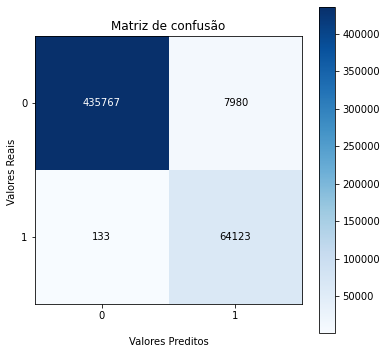

In [6]:
y_pred_opt = svm_cls.predict(X_test)
ax = skplt.metrics.plot_confusion_matrix(y_test, y_pred_opt, figsize=(6,6))
ax.set_title('Matriz de confusão')
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais ')

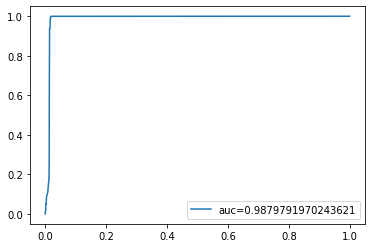

In [7]:
y_pred_proba = svm_cls.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

Cross Validation

In [5]:
X_train = np.concatenate((X_train,X_test), axis = 0)
y_train = np.concatenate((y_train,y_test), axis = 0)

In [6]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [7]:
from sklearn.model_selection import KFold, cross_validate

In [8]:

metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]
svm = SVC(C = 10, gamma = 1, kernel= "rbf", verbose = 5, shrinking=0, cache_size=1000)
metricas = cross_validate(svm, X_train, y_train, cv=10, scoring= metricas, n_jobs=-1)

for met in metricas:
    print(f"- {met}:")
    print(f"-- {metricas[met]}")
    print(f"-- {np.mean(metricas[met])} +- {np.std(metricas[met])}\n")  

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................